**Data Acquisition:**

In [1]:
import pandas as pd
data= pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df = pd.DataFrame(data)

**Data Inspection:**

In [2]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825212 entries, 0 to 825211
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           825212 non-null  int64  
 1   Date Rptd       825212 non-null  object 
 2   DATE OCC        825212 non-null  object 
 3   TIME OCC        825212 non-null  int64  
 4   AREA            825212 non-null  int64  
 5   AREA NAME       825212 non-null  object 
 6   Rpt Dist No     825212 non-null  int64  
 7   Part 1-2        825212 non-null  int64  
 8   Crm Cd          825212 non-null  int64  
 9   Crm Cd Desc     825212 non-null  object 
 10  Mocodes         711064 non-null  object 
 11  Vict Age        825212 non-null  int64  
 12  Vict Sex        716683 non-null  object 
 13  Vict Descent    716675 non-null  object 
 14  Premis Cd       825202 non-null  float64
 15  Premis Desc     824724 non-null  object 
 16  Weapon Used Cd  287714 non-null  float64
 17  Weapon Des

**Data Cleaning:**

In [4]:
# Check for missing data
df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           114148
Vict Age               0
Vict Sex          108529
Vict Descent      108537
Premis Cd             10
Premis Desc          488
Weapon Used Cd    537498
Weapon Desc       537498
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          764505
Crm Cd 3          823173
Crm Cd 4          825151
LOCATION               0
Cross Street      693343
LAT                    0
LON                    0
dtype: int64

In [6]:
df.fillna(0, inplace=True)
df.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [8]:
#converting date occ to yean and month for simplified analysis
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Year'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Year, dtype: int64

**Overall Crime Trends:**

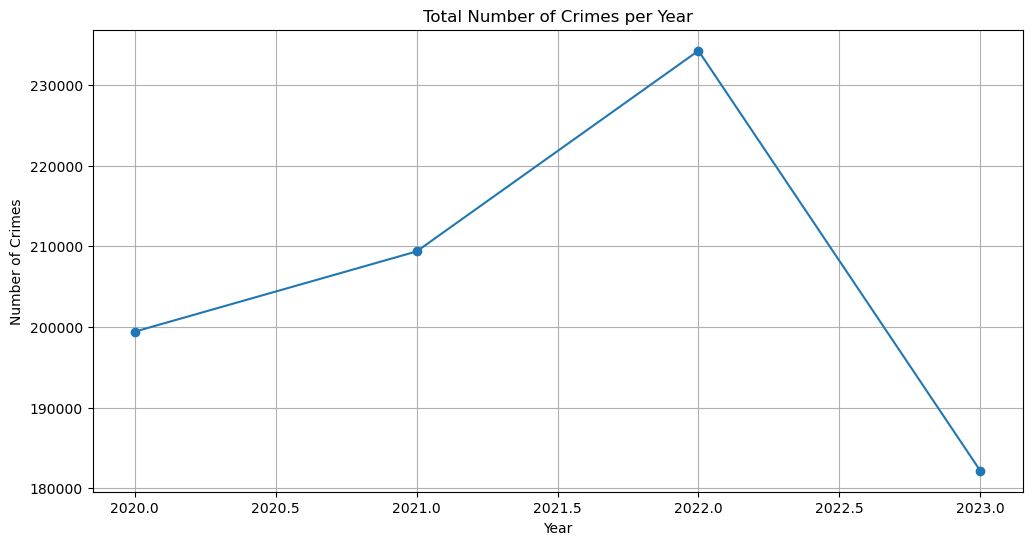

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

crime_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(crime_counts.index, crime_counts.values, marker='o', linestyle='-')
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

**Seasonal Patterns:**

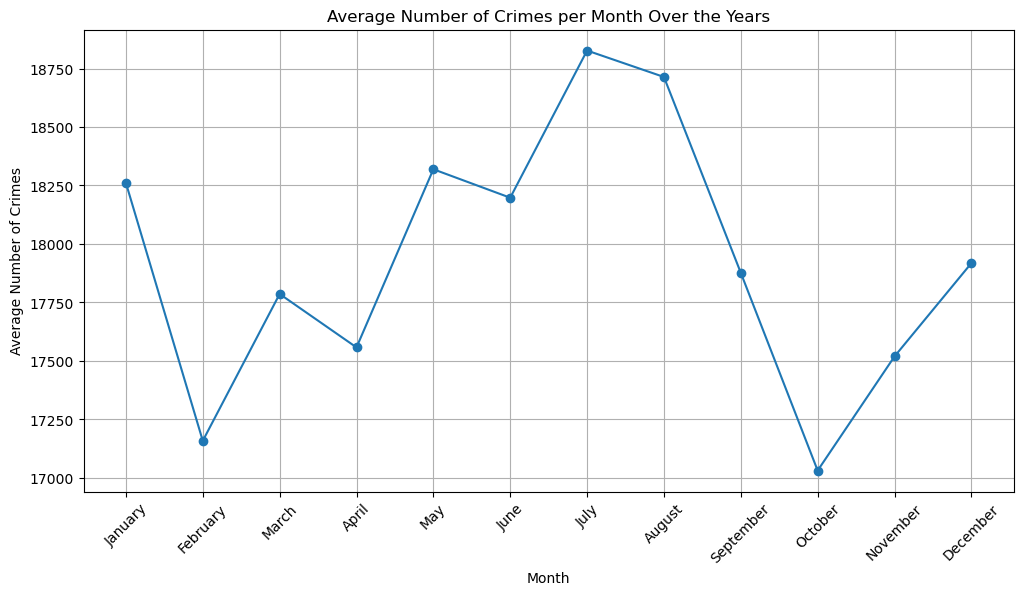

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_avg_crimes = df.groupby(['Year', 'Month'])['Crm Cd'].count().groupby('Month').mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
monthly_avg_crimes.plot(marker='o', linestyle='-')
plt.title('Average Number of Crimes per Month Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.xticks(range(1, 13), month_names, rotation=45)
plt.grid(True)
plt.show()